Владимир Кирилкин ПИ18-2

ML 1.3. Классификация
https://docs.google.com/document/d/1LMLA5OMOn0MQ41nAhX-KP-VwpP2FLp2DpmraiTBgOlI/edit

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

col_names = ['pregnant', 'glucose', 'bp', 'skin',
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('data/pima-indians-diabetes.csv', header=None, names=col_names)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
Y = pima.label
X = pima.drop(['label'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                   random_state=True)
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression(max_iter=1000000)
cls.fit(x_train, y_train)

LogisticRegression(max_iter=1000000)

In [21]:
from sklearn import metrics
y_pred = cls.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]], dtype=int64)

Text(0.5, 15.0, 'Предсказанные значения')

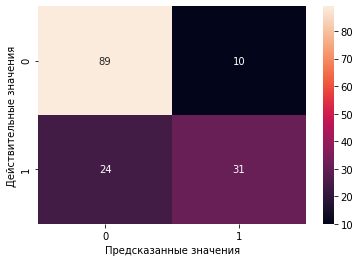

In [22]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)

sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [23]:
print(
"Метрика достоверности предсказания",
metrics.accuracy_score(y_test, y_pred),
"\nМетрика точности",
metrics.precision_score(y_test, y_pred),
"\nМетрика полноты",
metrics.recall_score(y_test, y_pred),
)

Метрика достоверности предсказания 0.7792207792207793 
Метрика точности 0.7560975609756098 
Метрика полноты 0.5636363636363636


In [26]:
from sklearn import svm

model1 = svm.SVC(kernel='linear')

model1.fit(x_train, y_train)
y_predict = model1.predict(x_test)

In [27]:
print(
"Метрика достоверности предсказания",
metrics.accuracy_score(y_test, y_predict),
"\nМетрика точности",
metrics.precision_score(y_test, y_predict),
"\nМетрика полноты",
metrics.recall_score(y_test, y_predict),
)

Метрика достоверности предсказания 0.7792207792207793 
Метрика точности 0.7560975609756098 
Метрика полноты 0.5636363636363636


Метрики эффективности у обоих моделей имеют одинаковые значения

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                   random_state=True)

models = [
    LogisticRegression(max_iter=10000000),
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    KNeighborsClassifier(),
    MLPClassifier(max_iter=1000000)
]

[model.fit(x_train, y_train) for model in models]
for model in models:
    predicted = model.predict(x_test)
    print(
        model,
        "\nМетрика достоверности предсказания",
        metrics.accuracy_score(y_test, predicted),
        "\nМетрика точности",
        metrics.precision_score(y_test, predicted),
        "\nМетрика полноты",
        metrics.recall_score(y_test, predicted),
    )

LogisticRegression() 
Метрика достоверности предсказания 0.7835497835497836 
Метрика точности 0.7777777777777778 
Метрика полноты 0.5764705882352941
SVC(kernel='linear') 
Метрика достоверности предсказания 0.7922077922077922 
Метрика точности 0.7936507936507936 
Метрика полноты 0.5882352941176471
SVC() 
Метрика достоверности предсказания 0.7705627705627706 
Метрика точности 0.8333333333333334 
Метрика полноты 0.47058823529411764
KNeighborsClassifier() 
Метрика достоверности предсказания 0.7705627705627706 
Метрика точности 0.7352941176470589 
Метрика полноты 0.5882352941176471
MLPClassifier() 
Метрика достоверности предсказания 0.6883116883116883 
Метрика точности 0.6181818181818182 
Метрика полноты 0.4


# Кривые обучения


In [92]:
def draw_learning_curve(model, x, y):
    train_sizes, train_scores, test_scores = learning_curve(model, x, y)
    fig, ax = plt.subplots()
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.grid()
    ax.set_title(model.__class__.__name__)

    ax.set_xlabel("Иттерация")
    ax.set_ylabel("Score")
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Обучение")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Кросс-валидация")
    ax.legend(loc="best")
    plt.show()

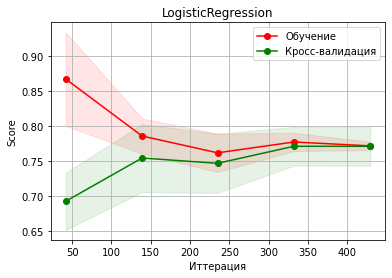

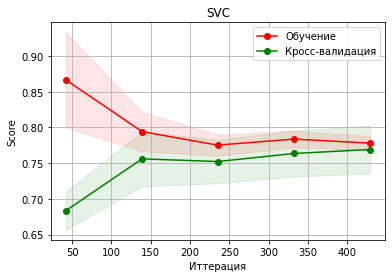

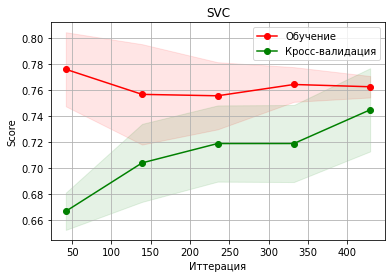

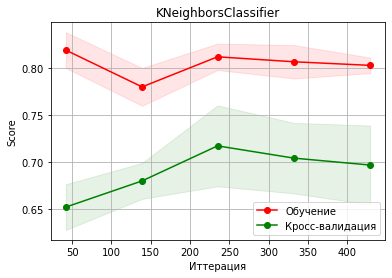

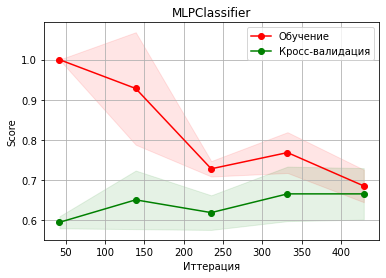

In [96]:
from sklearn.model_selection import learning_curve

for model in models:
    draw_learning_curve(model, x_train, y_train)

Лучшие результаты кривой обучения у первых двух моделей, когда модель метода k ближайших соседей оказалась заметно переобученной

## Теперь датасет с ирисами


In [102]:
from sklearn.datasets import load_iris
data = load_iris()
x = data["data"]
y = data["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.3,
                                                   random_state=True)


models = [
    LogisticRegression(max_iter=10000000),
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf'),
    KNeighborsClassifier(),
    MLPClassifier(max_iter=1000000)
]

[model.fit(x_train, y_train) for model in models]
for model in models:
    predicted = model.predict(x_test)
    print(
        model,
        "\nМетрика достоверности предсказания",
        metrics.accuracy_score(y_test, predicted, normalize=True),
        "\nМетрика точности",
        metrics.precision_score(y_test, predicted, average=None),
        "\nМетрика полноты",
        metrics.recall_score(y_test, predicted, average=None),
    )

LogisticRegression(max_iter=10000000) 
Метрика достоверности предсказания 0.9777777777777777 
Метрика точности [1.         1.         0.92857143] 
Метрика полноты [1.         0.94444444 1.        ]
SVC(kernel='linear') 
Метрика достоверности предсказания 1.0 
Метрика точности [1. 1. 1.] 
Метрика полноты [1. 1. 1.]
SVC() 
Метрика достоверности предсказания 0.9777777777777777 
Метрика точности [1.         1.         0.92857143] 
Метрика полноты [1.         0.94444444 1.        ]
KNeighborsClassifier() 
Метрика достоверности предсказания 0.9777777777777777 
Метрика точности [1.         0.94736842 1.        ] 
Метрика полноты [1.         1.         0.92307692]
MLPClassifier(max_iter=1000000) 
Метрика достоверности предсказания 1.0 
Метрика точности [1. 1. 1.] 
Метрика полноты [1. 1. 1.]


А на рисовании кривых обучения вылетают предупреждения от первых трех моделей

Но графики в итоге то рисуются, ток надо долистать

c:\users\admin\pycharmprojects\ml_course\venv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\admin\pycharmprojects\ml_course\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\admin\pycharmprojects\ml_course\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1372, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  warnings.warn("Estimator fit failed. The score on this train-test"
c:\users\admin\pycharmprojects\ml_course\venv\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The scor

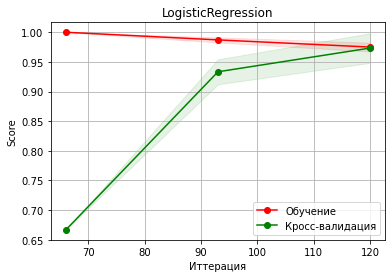

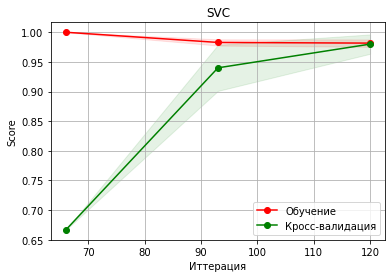

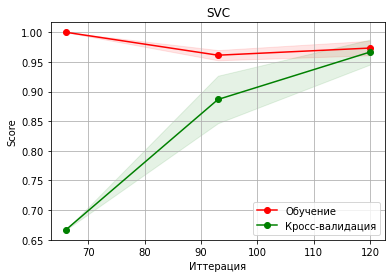

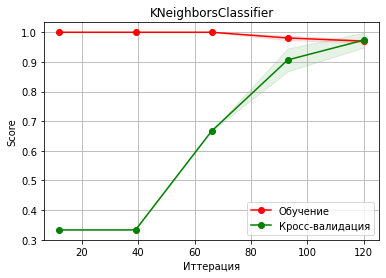

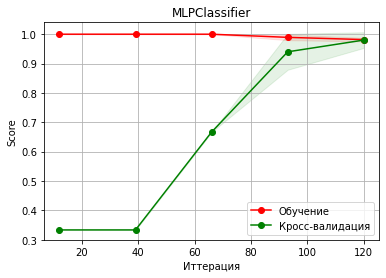

In [103]:
for model in models:
    draw_learning_curve(model, x, y)